In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima_model import ARIMA

In [ ]:
df = pd.read_csv('/content/Data (1).csv')

In [ ]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [ ]:
df.dtypes

Month                                                     object
Perrin Freres monthly champagne sales millions ?64-?72     int64
dtype: object

In [ ]:
df.columns = ['year','sales']

In [ ]:
df.head()

,year,sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [ ]:
df['year'] = pd.to_datetime(df['year'])

In [ ]:
df.head()

,year,sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [ ]:
df.dtypes

year     datetime64[ns]
sales             int64
dtype: object

In [ ]:
df.set_index(df['year'],inplace = True)

In [ ]:
df.head()

,year,sales
year,,
1964-01-01,1964-01-01,2815
1964-02-01,1964-02-01,2672
1964-03-01,1964-03-01,2755
1964-04-01,1964-04-01,2721
1964-05-01,1964-05-01,2946


In [ ]:
df.drop('year',inplace=True,axis=1)

In [ ]:
df.head()

,sales
year,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [ ]:
df.describe()

,sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


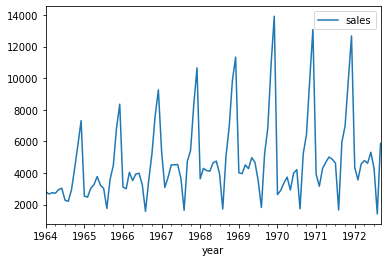

In [ ]:
df.plot()

In [ ]:
df.skew()

sales    1.639003
dtype: float64

In [ ]:
def replace_outlier(data,col,method = 'quartile',strategy='median'):

    col_data = data[col]

    # Using method 1 : Quartile

    if method == 'quartile':
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        IQR = q3-q1
        upper_limit = q3 + 1.5 * IQR
        lower_limit = q1 - 1.5 * IQR

    # Using method 2 : Standard Deviation
    elif method == 'standard deviation':
        col_mean = data[col].mean()
        col_std = data[col].std()
        limit = 2 *col_std
        up_limit = col_mean + limit
        low_limit = col_mean - limit

    else :
        print("Pass a correct method")




    # Displaying the outliers

    outliers =  data.loc[(col_data < lower_limit) | (col_data >upper_limit),col]
    outliers_percentage = round(len(outliers) / len(data),2)

    if len(outliers) == 0:
        print(f'The {col} has no outlier')
    else:
        print(f'The {col} has {len(outliers)} outliers')
        print(f'Outlier percentage : {outliers_percentage}')
        print(f'The {col} has outlier values:',np.sort(np.array(outliers)))
        display ( data.loc[(col_data < lower_limit) | (col_data >upper_limit),col])


        # Replacing outliers
        # Using strategy 1 that is 'median'

    if strategy == 'median':
        data.loc[(col_data < lower_limit) | (col_data >upper_limit),col] =data[col].median()


    # Using strategy 2 that is 'mean'

    elif strategy == 'mean':
        data.loc[(col_data < low_limit )| (col_data >up_limit),col] =data[col].mean()

    else:
        print('Pass a correct Strategy')

    return data

In [ ]:
# replace_outlier(df,'sales')

In [ ]:
df.skew()

sales    1.639003
dtype: float64

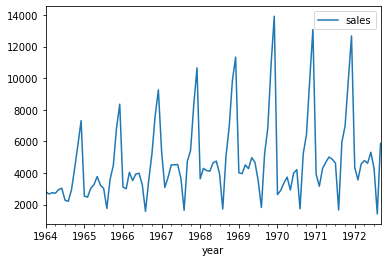

In [ ]:
df.plot()

In [ ]:
# outlier treatment is not required the time series

In [ ]:
# this data has a trend
#the data is non stationary
# the data has seasonality as we see the sales are increasing the later of the year
#



In [ ]:
#AD fuller test to test non stationary
# the will look the pvalue is greater than 0.05 then we say the there is non stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
ad1 = adfuller(df['sales'])

In [ ]:
ad1

(-1.8335930563276228,
 0.363915771660245,
 11,
 93,
 {'1%': -3.502704609582561,
  '10%': -2.583636712914788,
  '5%': -2.8931578098779522},
 1478.4633060594724)

In [ ]:
# as p stats is equal to  0.36 we confirm that non stationality exists
# the fiist value is the adfuller stastsics
# 2nd the tells about pvalue
# 3rd tells about the no of lags in observes
# 4 th value tells about of no of observation

# we always need to convert non stationary data to stationary data format

In [ ]:
# convert non stationary to stationary

df

,sales
year,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


In [ ]:
df['first_difference'] = df['sales'] - df['sales'].shift(1)

In [ ]:
df

,sales,first_difference
year,,
1964-01-01,2815,NaN
1964-02-01,2672,-143.0
1964-03-01,2755,83.0
1964-04-01,2721,-34.0
1964-05-01,2946,225.0
...,...,...
1972-05-01,4618,-170.0
1972-06-01,5312,694.0
1972-07-01,4298,-1014.0


In [ ]:
ad2 = adfuller(df['first_difference'].dropna())

In [ ]:
ad2

(-7.189896448050998,
 2.519620447387099e-10,
 11,
 92,
 {'1%': -3.503514579651927,
  '10%': -2.583823615311909,
  '5%': -2.893507960466837},
 1466.826726291589)

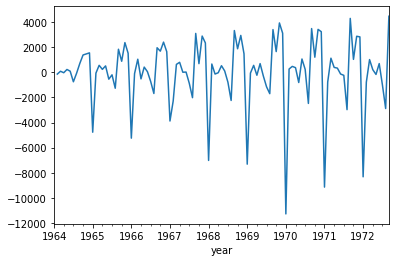

In [ ]:
df['first_difference'].plot()

In [ ]:
df['seanality_trend'] = df.sales-df.sales.shift(12)

In [ ]:
df

,sales,first_difference,seanality_trend
year,,,
1964-01-01,2815,NaN,NaN
1964-02-01,2672,-143.0,NaN
1964-03-01,2755,83.0,NaN
1964-04-01,2721,-34.0,NaN
1964-05-01,2946,225.0,NaN
...,...,...,...
1972-05-01,4618,-170.0,-392.0
1972-06-01,5312,694.0,438.0
1972-07-01,4298,-1014.0,-335.0


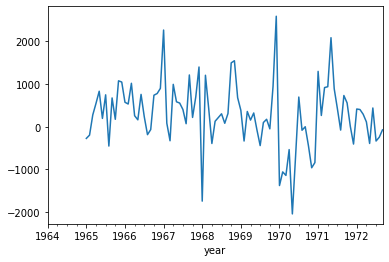

In [ ]:
df['seanality_trend'].plot()

In [ ]:
# AR model
# 1.AR  models
# performing ACF and PACF
# auto correlation function and partial auto correlation function

In [ ]:
# To understand the Order of AR and MA models

In [ ]:
from statsmodels.graphics.tsaplots import acf,pacf

In [ ]:
import statsmodels.api as sm

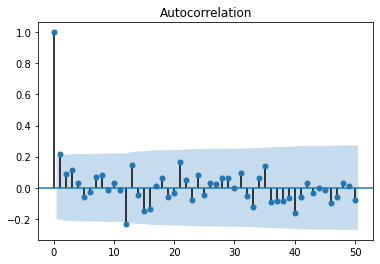

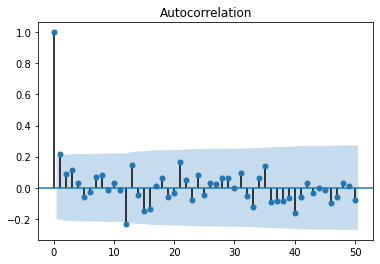

In [ ]:
sm.graphics.tsa.plot_acf(df['seanality_trend'].dropna(),lags = 50)

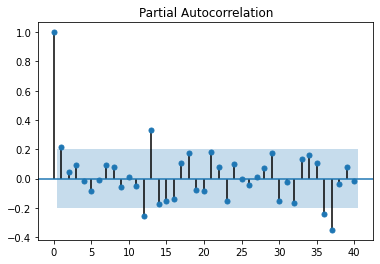

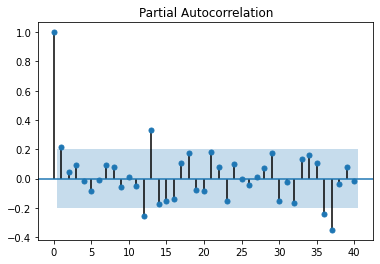

In [ ]:
sm.graphics.tsa.plot_pacf(df['seanality_trend'].dropna(),lags = 40)

In [ ]:
# we always look at the acf plot to identify the order of ma model. we take a look at the smooth decline and take it as the order

In [ ]:
# we always look at the pascf plot to identify the order of ar model. we look at the abrupt decline of the values and take it as the order.

In [ ]:
#  from the above graphs it is clear the MA and AR is 1

In [ ]:
# Builidng ARIMA model
#  p is eqaul to order
# D is equal to difference
# q is equal to MA
# order is equal to  P,D,Q

In [ ]:
model = ARIMA(df['sales'],order=(1,1,1))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
model_fit = model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Sun, 25 Jul 2021   AIC                           1910.251
Time:                        05:25:31   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7848     12.405      1.837      0.069      -1.529      47.099
ar.L1.D.sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# AIC   BIc and HQIC  are to check in the above summary


In [ ]:
df['forecast'] = model_fit.predict(start=87,end = 103,dynamic=True)

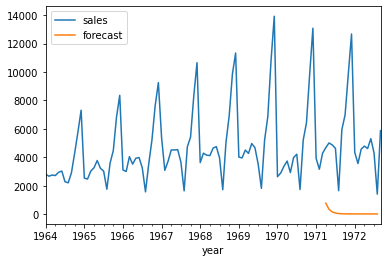

In [ ]:
df[['sales','forecast']].plot()

In [ ]:
# considering the seasonality trend


In [ ]:
model2 = sm.tsa.SARIMAX(df['sales'],order=(1,1,1),seasonal_order=(1,1,1,12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
model2_fit = model2.fit()

In [ ]:
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Sun, 25 Jul 2021   AIC                           1486.804
Time:                                    05:38:10   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (Q):                       40.24   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.46   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
df['forecast_sa'] = model2_fit.predict(start=90,end=103,dynamic=True)

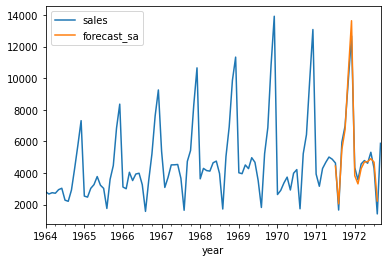

In [ ]:
df[['sales','forecast_sa']].plot()